# import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read the data

In [2]:
data = pd.read_csv('FuelConsumption.csv')

Read the dataset

In [3]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# get important columns

In [4]:
data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


# split data into Independent Variable and Dependent Variable

In [6]:
#X = data['ENGINESIZE'] #this will give o/p as series
X = data[['ENGINESIZE']].values #this will give o/p as array

In [7]:

#y = data['CO2EMISSIONS']
y = data['CO2EMISSIONS'].values

In [8]:
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [44]:
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

In [9]:
type(X)

numpy.ndarray

In [10]:
type(y)

numpy.ndarray

# train_test_split

In [12]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X, y , test_size=0.2 , random_state=50)

In [49]:
X.shape

(1067, 1)

In [50]:
x_train.shape

(853, 1)

In [51]:
x_test.shape

(214, 1)

In [52]:
y.shape

(1067,)

In [53]:
y_train.shape

(853,)

In [54]:
y_test.shape

(214,)

# using sklearn get the model

In [55]:
from sklearn.linear_model import LinearRegression

# train the model

In [56]:
regr = LinearRegression()

In [57]:
regr.fit(x_train,y_train)

LinearRegression()

# evaluation
1 / n sum((y_test - y_pred)**2)

In [58]:
y_pred = regr.predict(x_test)

In [59]:
#y_pred predicted answers 
#y_test actual answers

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(y_test,y_pred)

1003.6479716263691

# accuracy

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,y_pred)

0.7318451279829932

# Understanding Y = mx +  c

In [64]:
regr.coef_

array([39.74198439])

In [65]:
regr.intercept_

123.22198857689193

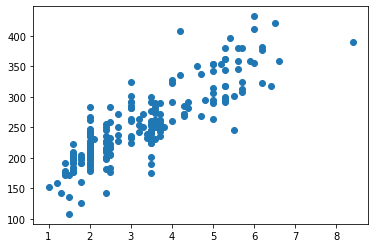

In [66]:
plt.scatter(x_test,y_test)

In [68]:
regr.coef_[0]

39.74198438865108

In [69]:
m = regr.coef_[0]

In [70]:
c = regr.intercept_

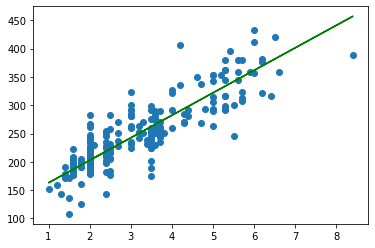

In [74]:
plt.scatter(x_test,y_test) #plot the data
plt.plot(x_test, m * x_test + c , c = 'g') #plot the best fit line

# real life prediction

In [77]:
regr.predict([[2.2]])

array([210.65435423])